# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.1'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Holy See', 'Solomon Islands'],
 3: ['Tanzania', 'Timor-Leste', 'Saint Kitts and Nevis'],
 4: ['Brunei', 'Dominica', 'Saint Lucia'],
 5: ['Grenada', 'Equatorial Guinea', 'Fiji'],
 6: ['Mauritius', 'Antigua and Barbuda'],
 7: ['Saint Vincent and the Grenadines', 'Cambodia', 'Gambia'],
 8: ['Madagascar', 'Bahamas', 'Vietnam', 'Northern Mariana Islands',
     'Trinidad and Tobago', 'Monaco', 'Kyrgyzstan', 'Seychelles'],
 9: ['Zimbabwe', 'Sao Tome and Principe', 'Malawi', 'Barbados', 'Lesotho',
     'Oman', 'Virgin Islands, U.S.', 'Burundi', 'Djibouti', 'Ghana',
     'Australia', 'Zambia', 'Liechtenstein', 'Swaziland', 'Suriname',
     'Kazakhstan', 'Republic of the Congo', 'Bolivia', 'Uzbekistan',
     'South Africa'],
 10: ['Guyana', 'Ethiopia', 'Bermuda', 'Chile', 'Angola', 'Liberia',
      'Guatemala', "Cote d'Ivoire", 'Namibia', 'Bahrain', 'Libya',
      'New Zealand', 'Philippines', 'Kuwait', 'Maldives', 'Venezuela',
      'Singapore', 'Eritrea', 'Comoros', 'Bhutan', 'Mo

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

10

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Finland', 'France', 'Ukraine', 'Germany', 'Portugal', 'Canada',
      'Romania', 'Denmark', 'Belgium'],
 17: ['United Kingdom']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
United Kingdom 0th    Past  14Feb2020  08Apr2020    66460344
               1st    Past  09Apr2020  29Apr2020    66460344
               2nd    Past  30Apr2020  25May2020    66460344
               3rd    Past  26May2020  01Aug2020    66460344
               4th    Past  02Aug2020  14Sep2020    66460344
               5th    Past  15Sep2020  02Oct2020    66460344
               6th    Past  03Oct2020  11Oct2020    66460344
               7th    Past  12Oct2020  18Oct2020    66460344
               8th    Past  19Oct2020  24Oct2020    66460344
               9th    Past  25Oct2020  30Oct2020    66460344
               10th   Past  31Oct2020  05Nov2020    66460344
               11th   Past  06Nov2020  11Nov2020    66460344
               12th   Past  12Nov2020  17Nov2020    66460344
               13th   Past  18Nov2020  23Nov2020    66460344
               14th   Past  24Nov2020  02Dec2020    66460344
               15th   Past  03Dec2020  09Dec2020    66460344
               16th   Past  10Dec2020  16Dec2020    66460344

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	GBR,  1st phase (09Apr2020 - 29Apr2020): finished  197 trials in 0 min 10 sec

	CAN,  1st phase (14Apr2020 - 29Apr2020): finished  204 trials in 0 min 10 sec

	BEL, 12th phase (09Nov2020 - 15Nov2020): finished  204 trials in 0 min 10 sec

	FRA,  6th phase (22Sep2020 - 30Sep2020): finished  209 trials in 0 min 10 sec

	FIN,  7th phase (05Oct2020 - 13Oct2020): finished  166 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 11Oct2020): finished  168 trials in 0 min 10 sec

	DEU, 15th phase (10Dec2020 - 16Dec2020): finished  166 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  155 trials in 0 min 10 sec

	ROU, 14th phase (03Dec2020 - 08Dec2020): finished  184 trials in 0 min 10 sec

	FRA,  5th phase (10Sep2020 - 21Sep2020): finished  180 trials in 0 min 10 sec

	ROU, 10th phase (05Nov2020 - 11Nov2020): finished  187 trials in 0 min 10 sec

	FRA, 11th phase (01Nov2020 - 10Nov2020): finished  181 trials in 0 min 10 sec

	DEU,  4th phase (16Jun2020 - 11Aug2020): finished  176 trials in 0 min 10 sec

	DEU, 10th phase (28Oct2020 - 02Nov2020): finished  199 trials in 0 min 10 sec

	GBR,  9th phase (25Oct2020 - 30Oct2020): finished  185 trials in 0 min 10 sec

	BEL, 14th phase (25Nov2020 - 05Dec2020): finished  195 trials in 0 min 10 sec

	DNK,  2nd phase (03May2020 - 12Jun2020): finished  172 trials in 0 min 10 sec

	DNK,  3rd phase (13Jun2020 - 09Aug2020): finished  163 trials in 0 min 10 sec

	GBR,  7th phase (12Oct2020 - 18Oct2020): finished  181 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 21Apr2020): finished  168 trials in 0 min 10 sec

	DNK,  9th phase (23Oct2020 - 29Oct2020): finished  187 trials in 0 min 10 sec

	CAN,  3rd phase (17May2020 - 07Jun2020): finished  180 trials in 0 min 10 sec

	CAN, 12th phase (20Nov2020 - 26Nov2020): finished  182 trials in 0 min 10 sec

	ROU,  8th phase (21Oct2020 - 28Oct2020): finished  177 trials in 0 min 10 sec

	ROU,  1st phase (02May2020 - 07Jul2020): finished  178 trials in 0 min 10 sec

	GBR, 15th phase (03Dec2020 - 09Dec2020): finished  191 trials in 0 min 10 sec

	BEL,  8th phase (06Oct2020 - 11Oct2020): finished  195 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  180 trials in 0 min 10 sec

	CAN,  5th phase (26Jul2020 - 06Sep2020): finished  176 trials in 0 min 10 sec

	ROU,  9th phase (29Oct2020 - 04Nov2020): finished  195 trials in 0 min 10 sec

	DEU, 11th phase (03Nov2020 - 12Nov2020): finished  196 trials in 0 min 10 sec

	GBR,  4th phase (02Aug2020 - 14Sep2020): finished  178 trials in 0 min 10 sec

	FRA,  2nd phase (28Apr2020 - 29Jul2020): finished  168 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  188 trials in 0 min 10 sec

	GBR, 14th phase (24Nov2020 - 02Dec2020): finished  195 trials in 0 min 10 sec

	UKR,  6th phase (01Oct2020 - 11Oct2020): finished  186 trials in 0 min 10 sec

	BEL,  7th phase (28Sep2020 - 05Oct2020): finished  202 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  189 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  191 trials in 0 min 10 sec

	UKR,  5th phase (17Sep2020 - 30Sep2020): finished  198 trials in 0 min 10 sec

	DNK,  0th phase (19Mar2020 - 12Apr2020): finished  184 trials in 0 min 10 sec

	UKR,  7th phase (12Oct2020 - 21Oct2020): finished  189 trials in 0 min 10 sec

	BEL,  1st phase (02Apr2020 - 14Apr2020): finished  188 trials in 0 min 10 sec

	FRA,  7th phase (01Oct2020 - 08Oct2020): finished  188 trials in 0 min 10 sec

	FIN,  6th phase (21Sep2020 - 04Oct2020): finished  190 trials in 0 min 10 sec

	ROU,  5th phase (10Sep2020 - 29Sep2020): finished  187 trials in 0 min 10 sec

	CAN,  8th phase (12Oct2020 - 24Oct2020): finished  186 trials in 0 min 10 sec

	DEU,  0th phase (14Jan2020 - 23Mar2020): finished  180 trials in 0 min 10 sec

	DNK,  8th phase (13Oct2020 - 22Oct2020): finished  192 trials in 0 min 10 sec

	CAN,  4th phase (08Jun2020 - 25Jul2020): finished  180 trials in 0 min 10 sec

	DEU,  7th phase (01Oct2020 - 13Oct2020): finished  190 trials in 0 min 10 sec

	BEL,  0th phase (21Mar2020 - 01Apr2020): finished  192 trials in 0 min 10 sec

	UKR,  8th phase (22Oct2020 - 29Oct2020): finished  182 trials in 0 min 10 sec

	CAN,  0th phase (26Mar2020 - 13Apr2020): finished  174 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 24Nov2020): finished  188 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 18Aug2020): finished  171 trials in 0 min 10 sec

	GBR,  8th phase (19Oct2020 - 24Oct2020): finished  171 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  163 trials in 0 min 10 sec

	GBR, 13th phase (18Nov2020 - 23Nov2020): finished  159 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 27Sep2020): finished  164 trials in 0 min 10 sec

	FRA,  4th phase (27Aug2020 - 09Sep2020): finished  174 trials in 0 min 10 sec

	FRA, 14th phase (26Nov2020 - 06Dec2020): finished  178 trials in 0 min 10 sec

	FRA, 15th phase (07Dec2020 - 16Dec2020): finished  180 trials in 0 min 10 sec

	GBR,  0th phase (14Feb2020 - 08Apr2020): finished  175 trials in 0 min 10 sec

	CAN,  6th phase (07Sep2020 - 27Sep2020): finished  166 trials in 0 min 10 sec

	DNK,  6th phase (21Sep2020 - 30Sep2020): finished  160 trials in 0 min 10 sec

	UKR, 10th phase (06Nov2020 - 12Nov2020): finished  153 trials in 0 min 10 sec

	DEU,  9th phase (22Oct2020 - 27Oct2020): finished  159 trials in 0 min 10 sec

	FIN,  0th phase (16Mar2020 - 04Apr2020): finished  157 trials in 0 min 10 sec

	DNK,  7th phase (01Oct2020 - 12Oct2020): finished  147 trials in 0 min 10 sec

	FRA, 12th phase (11Nov2020 - 16Nov2020): finished  158 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  155 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  181 trials in 0 min 10 sec

	ROU, 11th phase (12Nov2020 - 17Nov2020): finished  188 trials in 0 min 10 sec

	UKR,  1st phase (31May2020 - 08Jul2020): finished  184 trials in 0 min 10 sec

	CAN, 13th phase (27Nov2020 - 03Dec2020): finished  185 trials in 0 min 10 sec

	ROU,  4th phase (20Aug2020 - 09Sep2020): finished  191 trials in 0 min 10 sec

	GBR, 10th phase (31Oct2020 - 05Nov2020): finished  190 trials in 0 min 10 sec

	DNK,  4th phase (10Aug2020 - 08Sep2020): finished  182 trials in 0 min 10 sec

	UKR,  3rd phase (12Aug2020 - 31Aug2020): finished  190 trials in 0 min 10 sec

	DNK, 15th phase (01Dec2020 - 16Dec2020): finished  179 trials in 0 min 10 sec

	DNK, 10th phase (30Oct2020 - 04Nov2020): finished  187 trials in 0 min 10 sec

	FRA,  9th phase (16Oct2020 - 21Oct2020): finished  183 trials in 0 min 10 sec

	DEU,  3rd phase (22Apr2020 - 15Jun2020): finished  165 trials in 0 min 10 sec

	ROU,  7th phase (12Oct2020 - 20Oct2020): finished  183 trials in 0 min 10 sec

	FIN, 14th phase (02Dec2020 - 08Dec2020): finished  187 trials in 0 min 10 sec

	ROU,  0th phase (05Mar2020 - 01May2020): finished  173 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 26May2020): finished  179 trials in 0 min 10 sec

	CAN,  2nd phase (30Apr2020 - 16May2020): finished  184 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  192 trials in 0 min 10 sec

	UKR,  9th phase (30Oct2020 - 05Nov2020): finished  197 trials in 0 min 10 sec

	DEU,  6th phase (09Sep2020 - 30Sep2020): finished  187 trials in 0 min 10 sec

	FIN, 11th phase (12Nov2020 - 19Nov2020): finished  200 trials in 0 min 10 sec

	UKR,  2nd phase (09Jul2020 - 11Aug2020): finished  188 trials in 0 min 10 sec

	ROU, 13th phase (25Nov2020 - 02Dec2020): finished  195 trials in 0 min 10 sec

	BEL,  3rd phase (10May2020 - 27Jul2020): finished  178 trials in 0 min 10 sec

	DEU,  5th phase (12Aug2020 - 08Sep2020): finished  186 trials in 0 min 10 sec

	GBR,  5th phase (15Sep2020 - 02Oct2020): finished  192 trials in 0 min 10 sec

	BEL,  2nd phase (15Apr2020 - 09May2020): finished  186 trials in 0 min 10 sec

	DNK,  1st phase (13Apr2020 - 02May2020): finished  186 trials in 0 min 10 sec

	FIN, 10th phase (03Nov2020 - 11Nov2020): finished  190 trials in 0 min 10 sec

	GBR,  2nd phase (30Apr2020 - 25May2020): finished  193 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  186 trials in 0 min 10 sec

	FRA, 13th phase (17Nov2020 - 25Nov2020): finished  195 trials in 0 min 10 sec

	ROU,  3rd phase (31Jul2020 - 19Aug2020): finished  182 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 01Apr2020): finished  172 trials in 0 min 10 sec

	BEL, 10th phase (22Oct2020 - 01Nov2020): finished  179 trials in 0 min 10 sec

	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  170 trials in 0 min 10 sec

	PRT, 12th phase (13Nov2020 - 22Nov2020): finished  195 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  192 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 08Nov2020): finished  189 trials in 0 min 10 sec

	ROU,  2nd phase (08Jul2020 - 30Jul2020): finished  179 trials in 0 min 10 sec

	CAN,  9th phase (25Oct2020 - 03Nov2020): finished  204 trials in 0 min 10 sec

	BEL, 15th phase (06Dec2020 - 16Dec2020): finished  199 trials in 0 min 10 sec

	PRT, 13th phase (23Nov2020 - 03Dec2020): finished  204 trials in 0 min 10 sec

	DNK, 14th phase (25Nov2020 - 30Nov2020): finished  201 trials in 0 min 10 sec

	DNK,  5th phase (09Sep2020 - 20Sep2020): finished  198 trials in 0 min 10 sec

	DEU, 13th phase (24Nov2020 - 29Nov2020): finished  204 trials in 0 min 10 sec

	CAN, 10th phase (04Nov2020 - 11Nov2020): finished  198 trials in 0 min 10 sec

	FRA,  3rd phase (30Jul2020 - 26Aug2020): finished  199 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  198 trials in 0 min 10 sec

	FIN,  5th phase (19Aug2020 - 20Sep2020): finished  199 trials in 0 min 10 sec

	ROU, 12th phase (18Nov2020 - 24Nov2020): finished  203 trials in 0 min 10 sec

	FRA,  1st phase (02Apr2020 - 27Apr2020): finished  195 trials in 0 min 10 sec

	ROU,  6th phase (30Sep2020 - 11Oct2020): finished  192 trials in 0 min 10 sec

	FIN, 13th phase (26Nov2020 - 01Dec2020): finished  192 trials in 0 min 10 sec

	DEU, 12th phase (13Nov2020 - 23Nov2020): finished  186 trials in 0 min 10 sec

	UKR,  4th phase (01Sep2020 - 16Sep2020): finished  188 trials in 0 min 10 sec

	FIN, 15th phase (09Dec2020 - 16Dec2020): finished  191 trials in 0 min 10 sec

	FIN, 12th phase (20Nov2020 - 25Nov2020): finished  189 trials in 0 min 10 sec

	FRA,  8th phase (09Oct2020 - 15Oct2020): finished  182 trials in 0 min 10 sec

	DEU, 14th phase (30Nov2020 - 09Dec2020): finished  180 trials in 0 min 10 sec

	FIN,  9th phase (24Oct2020 - 02Nov2020): finished  196 trials in 0 min 10 sec

	FIN,  8th phase (14Oct2020 - 23Oct2020): finished  197 trials in 0 min 10 sec

	GBR,  3rd phase (26May2020 - 01Aug2020): finished  186 trials in 0 min 10 sec

	FRA, 10th phase (22Oct2020 - 31Oct2020): finished  204 trials in 0 min 10 sec

	CAN,  7th phase (28Sep2020 - 11Oct2020): finished  202 trials in 0 min 10 sec

	DEU,  8th phase (14Oct2020 - 21Oct2020): finished  197 trials in 0 min 10 sec

	PRT, 14th phase (04Dec2020 - 09Dec2020): finished  201 trials in 0 min 10 sec

	UKR,  0th phase (21Mar2020 - 30May2020): finished  185 trials in 0 min 10 sec

	UKR, 11th phase (13Nov2020 - 19Nov2020): finished  208 trials in 0 min 10 sec

Completed optimization. Total: 6 min 49 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE       Rt  \
Country        Phase                                                           
United Kingdom 0th    Past  14Feb2020  08Apr2020    66460344  SIR-F   107.58   
               1st    Past  09Apr2020  29Apr2020    66460344  SIR-F    28.28   
               2nd    Past  30Apr2020  25May2020    66460344  SIR-F     8.24   
               3rd    Past  26May2020  01Aug2020    66460344  SIR-F    21.47   
               4th    Past  02Aug2020  14Sep2020    66460344  SIR-F    30.63   
               5th    Past  15Sep2020  02Oct2020    66460344  SIR-F    26.84   
               6th    Past  03Oct2020  11Oct2020    66460344  SIR-F     79.9   
               7th    Past  12Oct2020  18Oct2020    66460344  SIR-F  3279.84   
               8th    Past  19Oct2020  24Oct2020    66460344  SIR-F    38.78   
               9th    Past  25Oct2020  30Oct2020    66460344  SIR-F   118.75   
               10th   Past  31Oct2020  05Nov2020    66460344  SIR-F   100.63   
               11th   Past  06Nov2020  11Nov2020    66460344  SIR-F    24.72   
               12th   Past  12Nov2020  17Nov2020    66460344      -        -   
               13th   Past  18Nov2020  23Nov2020    66460344  SIR-F    40.73   
               14th   Past  24Nov2020  02Dec2020    66460344  SIR-F    19.02   
               15th   Past  03Dec2020  09Dec2020    66460344  SIR-F     7.83   
               16th   Past  10Dec2020  16Dec2020    66460344      -        -   

                           theta        kappa         rho        sigma  tau  \
Country        Phase                                                          
United Kingdom 0th     0.0497192  0.000148238   0.0456436  0.000254949  360   
               1st      0.191758  0.000400274   0.0141126  3.05166e-06  360   
               2nd     0.0178512  0.000539892  0.00453978  1.45471e-06  360   
               3rd      0.681424  1.41729e-05   0.0010229  1.00279e-06  360   
               4th      0.928978  1.85307e-06  0.00116847  8.56604e-07  360   
               5th      0.458953  7.11105e-05  0.00355825  6.23978e-07  360   
               6th     0.0040664  9.26425e-05  0.00746917  4.62015e-07  360   
               7th     0.0123505  1.85307e-06  0.00739827  3.74756e-07  360   
               8th     0.0575014  0.000180071  0.00742312  3.19353e-07  360   
               9th    0.00144834  5.43331e-05  0.00649318  2.66944e-07  360   
               10th   0.00167411   5.4333e-05  0.00550091  2.37728e-07  360   
               11th    0.0150728  0.000191595  0.00481311  2.10261e-07  360   
               12th            -            -           -            -    -   
               13th    0.0805685  7.93545e-05  0.00352291  1.71326e-07  360   
               14th     0.417599  7.11105e-05  0.00232743  1.60778e-07  360   
               15th     0.389913  0.000190452  0.00244532  1.49836e-07  360   
               16th            -            -           -            -    -   

                     alpha1 [-] 1/alpha2 [day] 1/beta [day] 1/gamma [day]  \
Country        Phase                                                        
United Kingdom 0th         0.05           1686            5           980   
               1st        0.192            624           17         81922   
               2nd        0.018            463           55        171855   
               3rd        0.681          17639          244        249303   
               4th        0.929         134911          213        291850   
               5th        0.459           3515           70        400654   
               6th        0.004           2698           33        541108   
               7th        0.012         134911           33        667101   
               8th        0.058           1388           33        782833   
               9th        0.001           4601           38        936527   
               10th       0.002           4601           45   1.05162e+06  

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-16,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,57.41
1,2020-03-17,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,57.41
2,2020-03-18,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81
3,2020-03-19,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81
4,2020-03-20,Finland,0.001072,7.93546e-05,0.0218232,0.000135819,0.001,3150,11,1840,...,2,4,0,1,1,4,2,1,1,64.81


### $Rt$: Reprodcution number $\mathrm{[-]}$

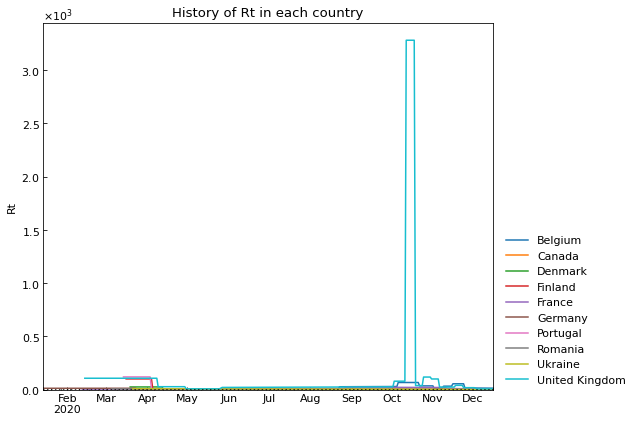

Country,Belgium,Canada,Denmark,Finland,France,Germany,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-12,14.22,1.34,2.05,1.25,3.77,0.72,0.79,0.9,1.85,7.83
2020-12-13,14.22,1.34,2.05,1.25,3.77,0.72,0.79,0.9,1.85,7.83
2020-12-14,14.22,1.34,2.05,1.25,3.77,0.72,0.79,0.9,1.85,7.83
2020-12-15,14.22,1.34,2.05,1.25,3.77,0.72,0.79,0.9,1.85,7.83
2020-12-16,14.22,1.34,2.05,1.25,3.77,0.72,0.79,0.9,1.85,7.83


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

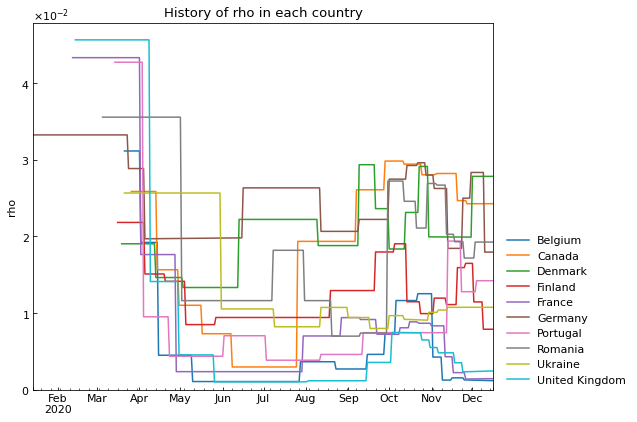

Country,Belgium,Canada,Denmark,Finland,France,Germany,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-12,0.001176,0.024268,0.027835,0.007887,0.001443,0.017953,0.014219,0.019262,0.010752,0.002445
2020-12-13,0.001176,0.024268,0.027835,0.007887,0.001443,0.017953,0.014219,0.019262,0.010752,0.002445
2020-12-14,0.001176,0.024268,0.027835,0.007887,0.001443,0.017953,0.014219,0.019262,0.010752,0.002445
2020-12-15,0.001176,0.024268,0.027835,0.007887,0.001443,0.017953,0.014219,0.019262,0.010752,0.002445
2020-12-16,0.001176,0.024268,0.027835,0.007887,0.001443,0.017953,0.014219,0.019262,0.010752,0.002445


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

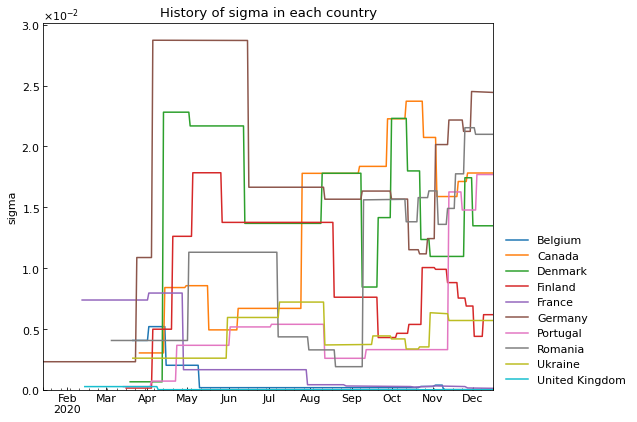

Country,Belgium,Canada,Denmark,Finland,France,Germany,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-12,0.000008,0.017812,0.013473,0.006167,0.000114,0.024436,0.017686,0.020992,0.005688,1.498361e-07
2020-12-13,0.000008,0.017812,0.013473,0.006167,0.000114,0.024436,0.017686,0.020992,0.005688,1.498361e-07
2020-12-14,0.000008,0.017812,0.013473,0.006167,0.000114,0.024436,0.017686,0.020992,0.005688,1.498361e-07
2020-12-15,0.000008,0.017812,0.013473,0.006167,0.000114,0.024436,0.017686,0.020992,0.005688,1.498361e-07
2020-12-16,0.000008,0.017812,0.013473,0.006167,0.000114,0.024436,0.017686,0.020992,0.005688,1.498361e-07


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

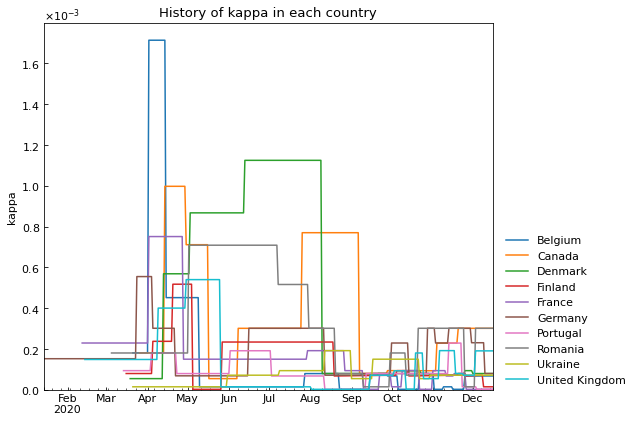

Country,Belgium,Canada,Denmark,Finland,France,Germany,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-12,0.000067,0.000301,0.000079,0.000014,0.000002,0.000079,0.000002,0.000301,0.000071,0.00019
2020-12-13,0.000067,0.000301,0.000079,0.000014,0.000002,0.000079,0.000002,0.000301,0.000071,0.00019
2020-12-14,0.000067,0.000301,0.000079,0.000014,0.000002,0.000079,0.000002,0.000301,0.000071,0.00019
2020-12-15,0.000067,0.000301,0.000079,0.000014,0.000002,0.000079,0.000002,0.000301,0.000071,0.00019
2020-12-16,0.000067,0.000301,0.000079,0.000014,0.000002,0.000079,0.000002,0.000301,0.000071,0.00019


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

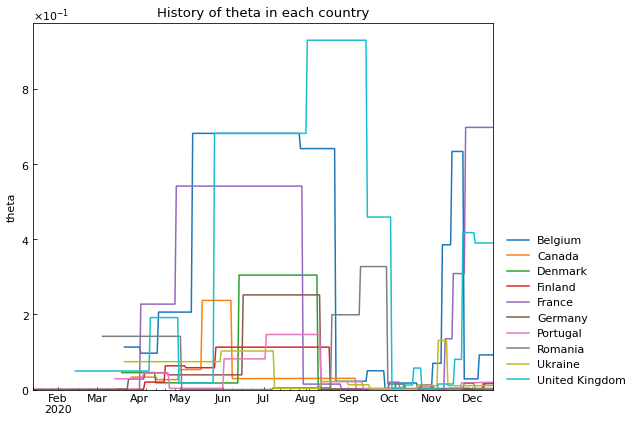

Country,Belgium,Canada,Denmark,Finland,France,Germany,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-12,0.092504,0.002617,0.001598,0.017358,0.697239,0.015989,0.019827,0.003086,0.010628,0.389913
2020-12-13,0.092504,0.002617,0.001598,0.017358,0.697239,0.015989,0.019827,0.003086,0.010628,0.389913
2020-12-14,0.092504,0.002617,0.001598,0.017358,0.697239,0.015989,0.019827,0.003086,0.010628,0.389913
2020-12-15,0.092504,0.002617,0.001598,0.017358,0.697239,0.015989,0.019827,0.003086,0.010628,0.389913
2020-12-16,0.092504,0.002617,0.001598,0.017358,0.697239,0.015989,0.019827,0.003086,0.010628,0.389913


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29118 entries, 0 to 29243
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 29118 non-null  datetime64[ns]
 1   Country                              29118 non-null  object        
 2   Rt                                   29118 non-null  float64       
 3   theta                                29118 non-null  float64       
 4   kappa                                29118 non-null  float64       
 5   rho                                  29118 non-null  float64       
 6   sigma                                29118 non-null  float64       
 7   School_closing                       29118 non-null  int64         
 8   Workplace_closing                    29118 non-null  int64         
 9   Cancel_events                        29118 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.054045,-0.087290,-0.013044,-0.102272,-0.080776,-0.010553,0.040580,0.013749,0.073221,-0.035253,0.064230,-0.086088,0.015001,-0.045244,-0.051331,-0.021105
theta,-0.054045,1.000000,-0.241808,-0.536166,-0.374177,0.215733,0.160055,0.356290,0.293139,0.358879,0.115663,0.423344,-0.051415,0.155430,-0.096260,0.222522,0.246786
kappa,-0.087290,-0.241808,1.000000,0.182861,0.240198,0.237661,0.202871,-0.191954,-0.047085,-0.163377,0.065077,-0.164450,0.094078,0.009197,-0.073160,-0.163158,0.130720
rho,-0.013044,-0.536166,0.182861,1.000000,0.377996,-0.291852,-0.391989,-0.404659,-0.603194,-0.525305,-0.373965,-0.527632,-0.322436,-0.386672,-0.274858,-0.187362,-0.499645
sigma,-0.102272,-0.374177,0.240198,0.377996,1.000000,0.074723,0.027571,-0.095716,0.040781,-0.525573,-0.131928,-0.380731,0.384325,0.061041,0.363898,0.163486,0.001793
School_closing,-0.080776,0.215733,0.237661,-0.291852,0.074723,1.000000,0.708548,0.151084,0.462731,0.212354,0.507593,0.239565,0.300107,0.399175,0.047432,-0.058632,0.747104
Workplace_closing,-0.010553,0.160055,0.202871,-0.391989,0.027571,0.708548,1.000000,0.474398,0.680548,0.303569,0.729774,0.404541,0.360093,0.510838,0.154880,-0.090140,0.878789
Cancel_events,0.040580,0.356290,-0.191954,-0.404659,-0.095716,0.151084,0.474398,1.000000,0.646056,0.466083,0.491095,0.682575,0.122388,0.423975,0.023824,0.029553,0.587152
Gatherings_restrictions,0.013749,0.293139,-0.047085,-0.603194,0.040781,0.462731,0.680548,0.646056,1.000000,0.426243,0.590891,0.642307,0.497265,0.607495,0.409743,0.261692,0.778063
Transport_closing,0.073221,0.358879,-0.163377,-0.525305,-0.525573,0.212354,0.303569,0.466083,0.426243,1.000000,0.425899,0.673931,-0.074098,0.255312,-0.067044,-0.045720,0.448488


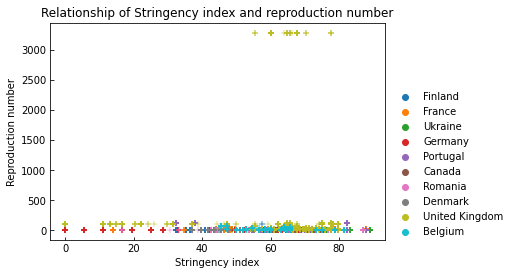

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()